Found Files: ['walk1_subject1_1', 'walk1_subject1_0', 'run2_subject1_0', 'run2_subject1_1']
Found Files: ['walk2_subject1_0', 'run2_subject1_0']
Starting Training of ModelCompatibilityRefinement...
Creating DB...
Creating NN & Trainer...
Starting training...
DiscriminatorLosses: Generated: 0.2981395125389099 	 	 True: 2.0439157485961914
Iteration 0: 850.7114868164062
DiscriminatorLosses: Generated: 0.09187502413988113 	 	 True: 0.39863085746765137
Iteration 1: 1265.46142578125
DiscriminatorLosses: Generated: 0.29432082176208496 	 	 True: 0.08508044481277466
Iteration 2: 811.2482299804688
DiscriminatorLosses: Generated: 0.8157336711883545 	 	 True: 0.009724763222038746
Iteration 3: 940.97607421875
DiscriminatorLosses: Generated: 0.9942565560340881 	 	 True: 0.011360088363289833
Iteration 4: 781.5286254882812
DiscriminatorLosses: Generated: 0.7370782494544983 	 	 True: 0.0006079123704694211
Iteration 5: 839.9514770507812
DiscriminatorLosses: Generated: 0.5388574600219727 	 	 True: 0.0467

/Users/alexgreenen/Documents/Project/Main/ModelCompatibilityRefinement_2/Vizualise.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


Iteration 0: 303.5317077636719
Iteration 1: 539.573974609375
Iteration 2: 370.06085205078125
Iteration 3: 315.41558837890625
Iteration 4: 255.1328887939453
Iteration 5: 173.03358459472656
Iteration 6: 233.84507751464844
Iteration 7: 245.09414672851562
Iteration 8: 266.3411865234375
Iteration 9: 365.9837951660156
Iteration 10: 399.47369384765625
Iteration 11: 278.5592956542969
DiscriminatorLosses: Generated: 0.07415365427732468 	 	 True: 0.22756914794445038
Iteration 12: 312.9873962402344
DiscriminatorLosses: Generated: 0.08808603882789612 	 	 True: 0.22828584909439087
Iteration 13: 212.66539001464844
Iteration 14: 301.9774169921875
Iteration 15: 204.28103637695312
Iteration 16: 276.1479187011719
Iteration 17: 327.8902893066406
Iteration 18: 301.9930725097656
Iteration 19: 342.2610168457031
Iteration 20: 280.1513671875
Iteration 21: 255.054931640625
Iteration 22: 202.7916717529297
Iteration 23: 340.83416748046875
Iteration 24: 381.39739990234375
Iteration 25: 302.55059814453125
Iteratio

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x25 and 1x74)

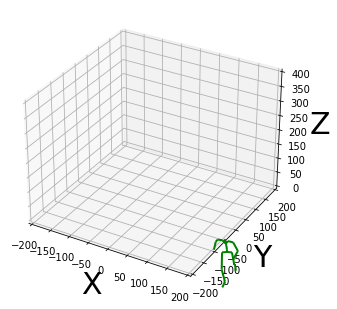

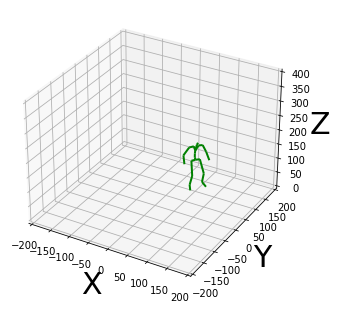

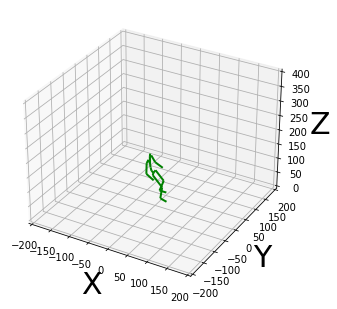

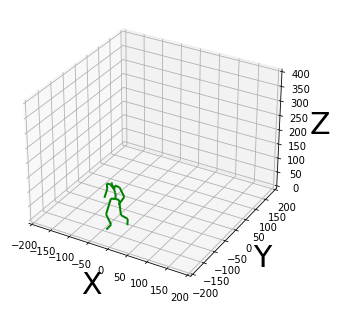

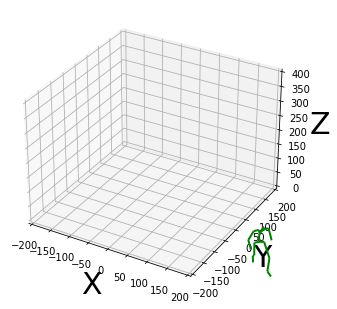

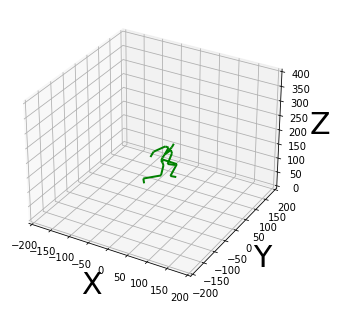

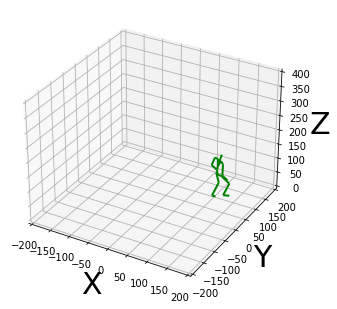

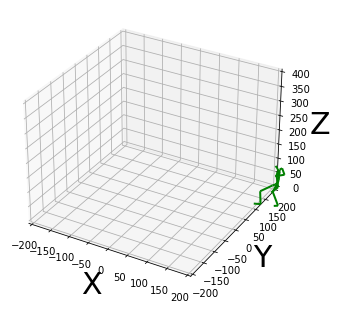

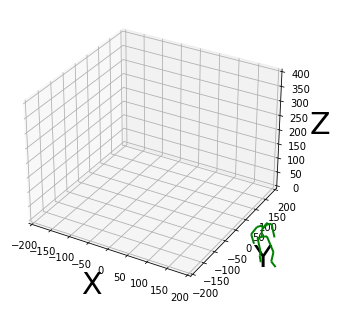

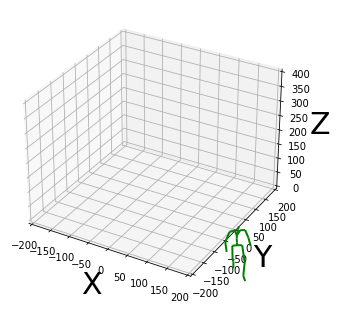

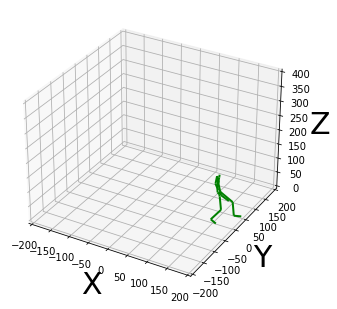

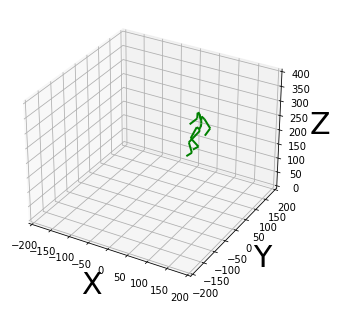

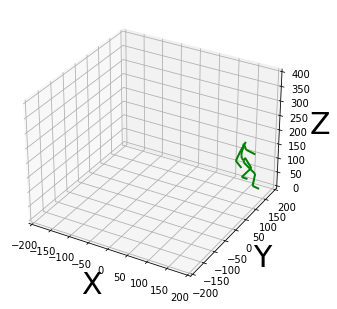

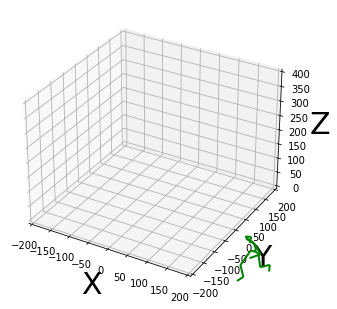

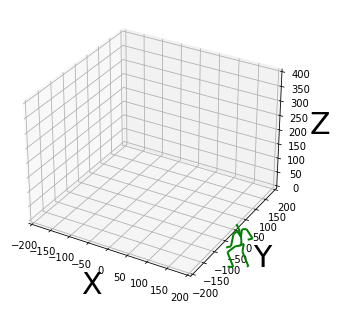

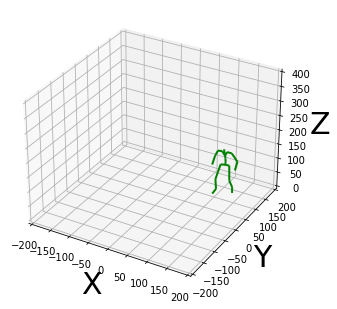

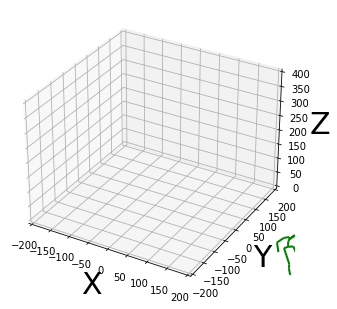

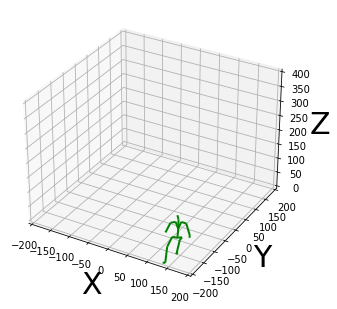

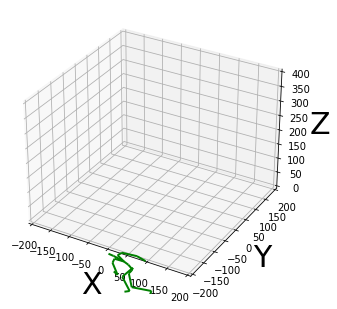

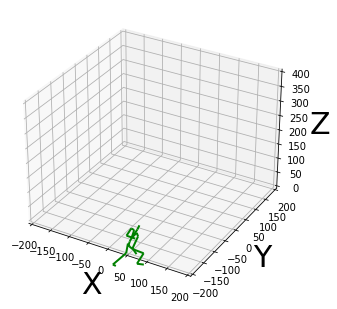

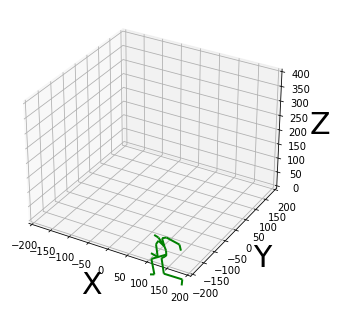

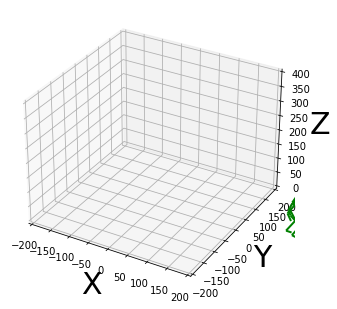

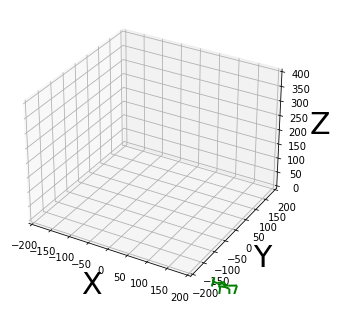

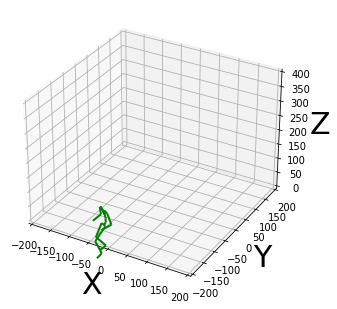

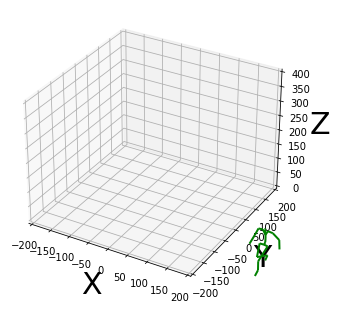

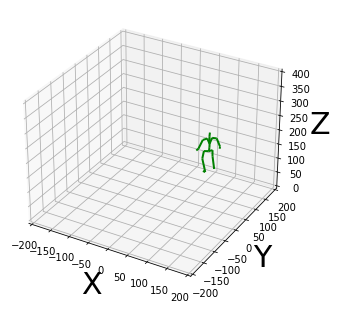

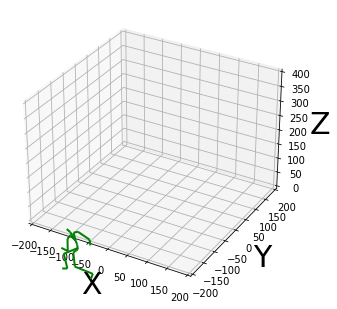

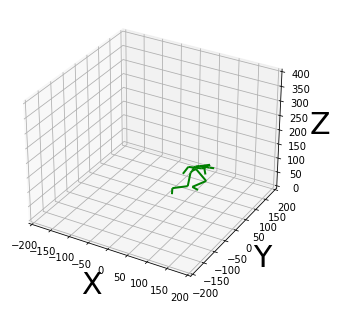

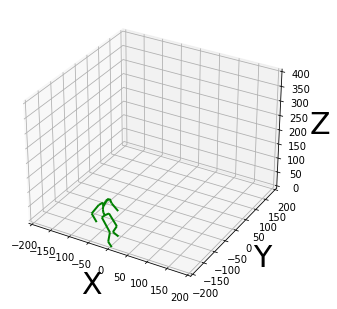

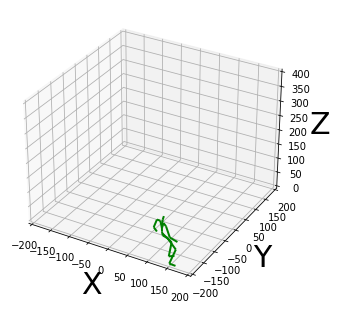

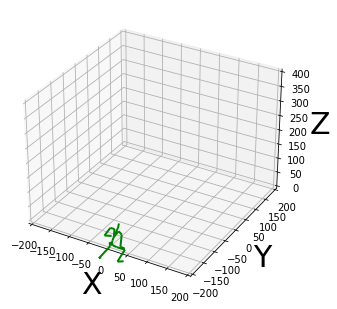

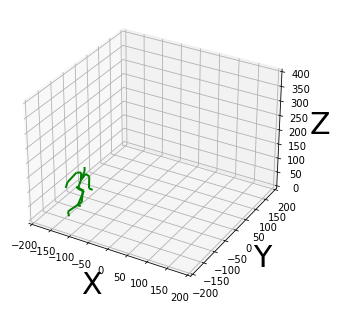

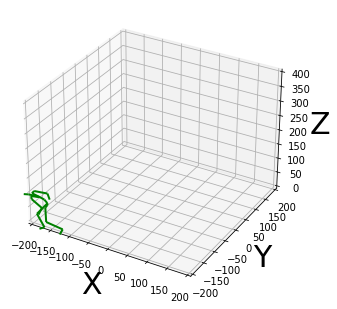

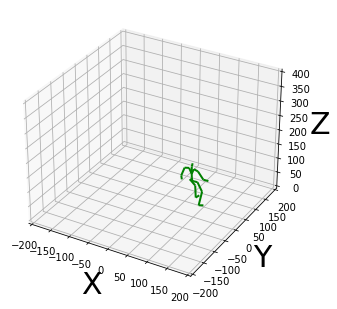

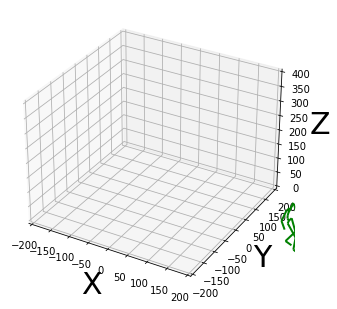

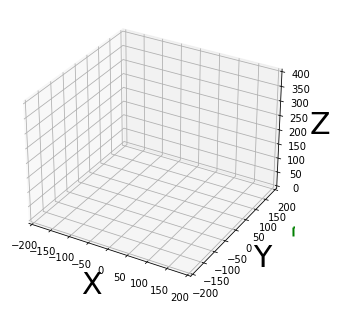

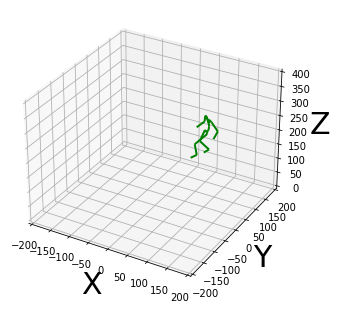

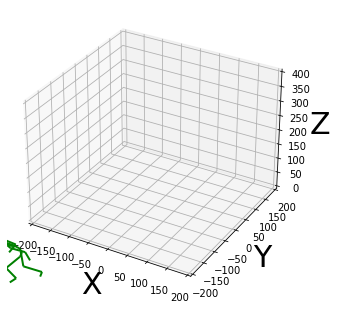

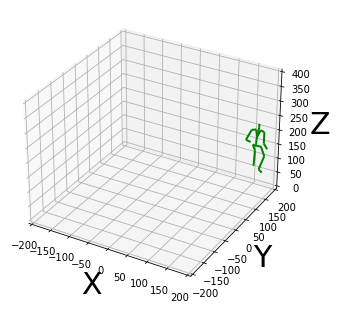

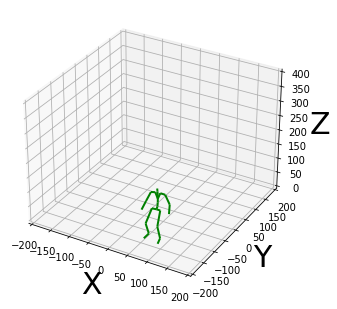

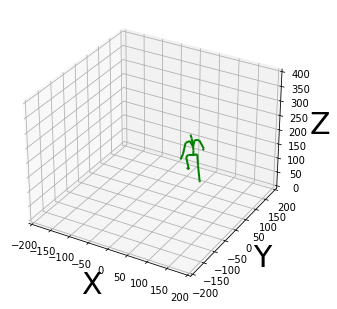

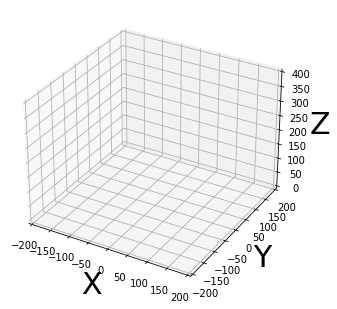

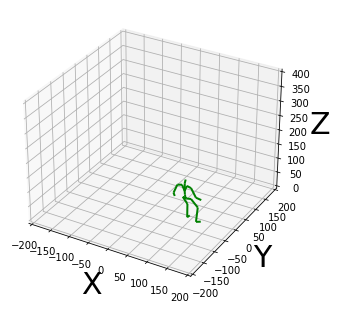

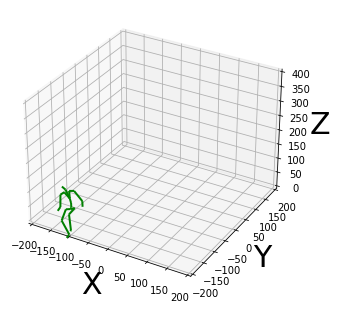

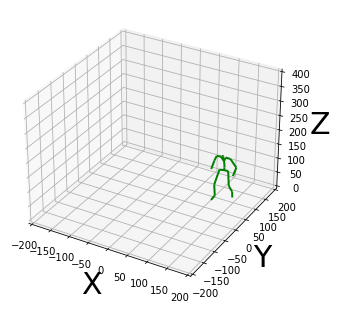

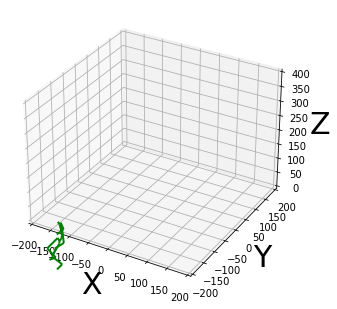

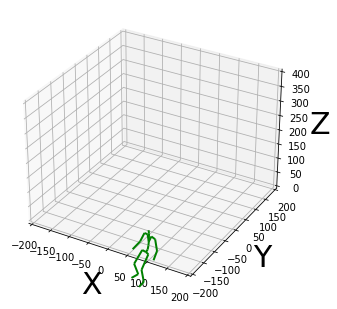

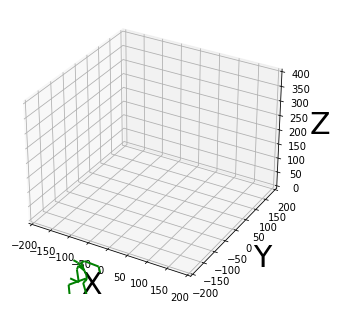

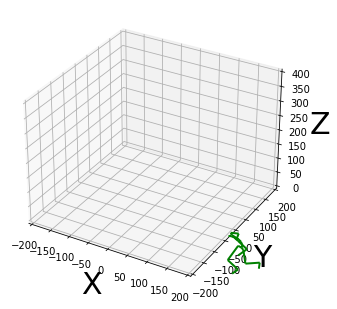

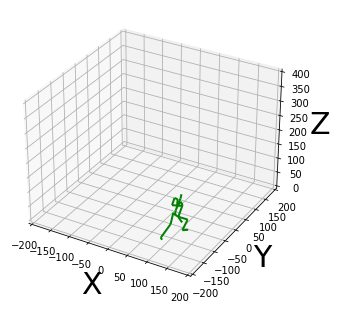

In [1]:
from ProcessData.TrainingLoss import TrainingLoss
import time
from ModelCompatibilityRefinement_2.Database import DataBase
from ModelCompatibilityRefinement_2.Train import Train, TrainingConfig
from ModelCompatibilityRefinement_2.LossType import ModelCompatibilityRefinementLossType
import Format 

# USE: conda activate /Users/alexgreenen/Documents/Project/training
#      /Users/alexgreenen/Documents/Project/training/bin/python -m cProfile -o program.prof general_use.py
#      snakeviz program.prof

DB_train = DataBase('TrainingData', sequenceLength=90, sampling_down_factor=1./45)
DB_validation = DataBase('ValidationData', sequenceLength=90, sampling_down_factor=1./90)

name = Format.name
network_dir = ['VAE/VAE_{}.pymodel'.format(name), 'LowFrequency_2/LF_{}.pymodel'.format(name), 'HighFrequency_2/HF_{}.pymodel'.format(name)]

training_config = TrainingConfig(1, 50, 0.01, 0.8, 2, 30)
error_config = TrainingLoss(ModelCompatibilityRefinementLossType, [
                20,             # Discriminator 
                2,              # LowFrequency
                0.5,            # Angle
                0.02,           # FK
                40.,            # PosVel
                1.,             # Rotflat
                10.,            # RotVelVert
                5.,             # Height
                0.1,            # Feet
                1,              # Contacts
                0.2,            # Angle Smooth
                0.01,           # FK Smooth
                1.,             # PosVel Smooth
                2.,             # Rotflat Smooth
                0.,             # RotVelVert Smooth
                1.,             # Height Smooth
                0.05,           # FeetSmooth
                ])

Train(training_config, error_config, "Refinement_"+name+time.strftime("_%m-%d-%H:%M"), DB_train, DB_validation, network_dir, True)